In [0]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import timeit
import time

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.2.5 backend: tensorflow


In [0]:
batch_size=128
num_classes=10
epochs=10
img_rows,img_cols=28,28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [71]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [0]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [74]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [75]:
nb_units = 50
nb_classes = 10
model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

# To stack multiple RNN layers, all RNN layers except the last one need
# to have "return_sequences=True".  An example of using two RNN layers:
#model.add(SimpleRNN(16,
#                    input_shape=(img_rows, img_cols),
#                    return_sequences=True))
#model.add(SimpleRNN(32))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_94 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________
None


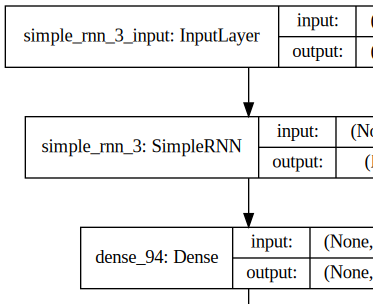

In [76]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [77]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 318us/step - loss: 1.5897 - acc: 0.4335 - val_loss: 1.3666 - val_acc: 0.4862
Epoch 2/10
60000/60000 [==============================] - 15s 254us/step - loss: 1.3257 - acc: 0.4999 - val_loss: 1.3091 - val_acc: 0.5048
Epoch 3/10
60000/60000 [==============================] - 15s 258us/step - loss: 1.2824 - acc: 0.5109 - val_loss: 1.2833 - val_acc: 0.5141
Epoch 4/10
60000/60000 [==============================] - 15s 254us/step - loss: 1.2610 - acc: 0.5173 - val_loss: 1.2627 - val_acc: 0.5149
Epoch 5/10
60000/60000 [==============================] - 15s 257us/step - loss: 1.2404 - acc: 0.5247 - val_loss: 1.2472 - val_acc: 0.5220
Epoch 6/10
60000/60000 [==============================] - 15s 254us/step - loss: 1.2265 - acc: 0.5255 - val_loss: 1.2507 - val_acc: 0.5203
Epoch 7/10
60000/60000 [==============================] - 16s 258us/step - loss: 1.2112 - acc: 0.5342 - val_loss: 1.

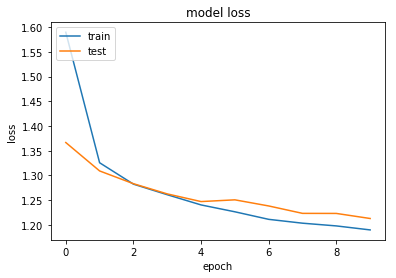

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
history

Text(0.5, 1.0, 'Accuracy Curves')

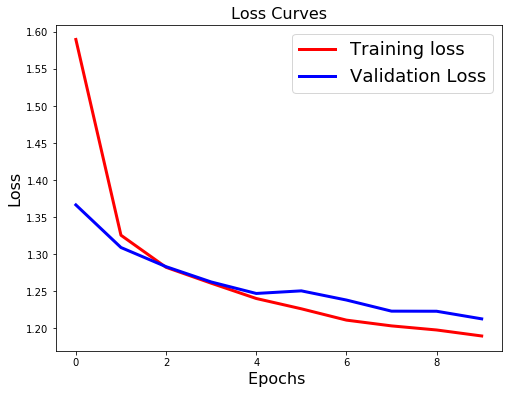

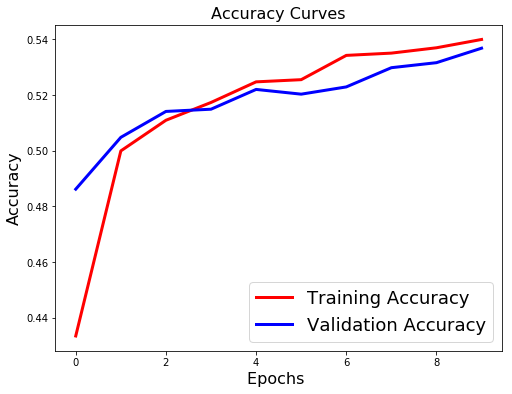

In [79]:



# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [80]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 

 
# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, lrate):
	# define model
  model = Sequential()

  # Recurrent layers supported: SimpleRNN, LSTM, GRU:
  model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

  # To stack multiple RNN layers, all RNN layers except the last one need
  # to have "return_sequences=True".  An example of using two RNN layers:
  #model.add(SimpleRNN(16,
  #                    input_shape=(img_rows, img_cols),
  #                    return_sequences=True))
  #model.add(SimpleRNN(32))

  model.add(Dense(units=nb_classes))
  model.add(Activation('softmax'))

  
  # compile model
  opt = SGD(lr=lrate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('lrate='+str(lrate), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
'''for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(x_train, y_train, x_test, y_test, learning_rates[i])
# show learning curves
pyplot.show() '''

'for i in range(len(learning_rates)):\n\t# determine the plot number\n\tplot_no = 420 + (i+1)\n\tpyplot.subplot(plot_no)\n\t# fit model and plot learning curves for a learning rate\n\tfit_model(x_train, y_train, x_test, y_test, learning_rates[i])\n# show learning curves\npyplot.show() '

Execution time 537.8466925430002


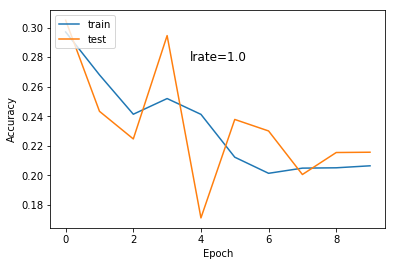

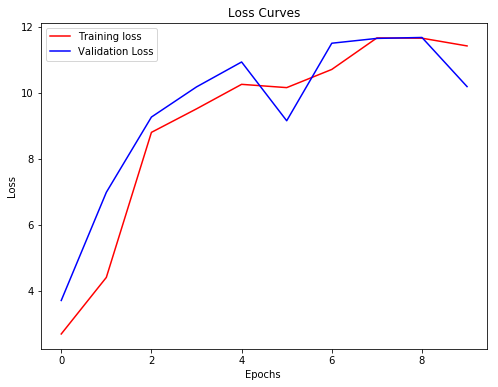

Execution time 541.517690005001


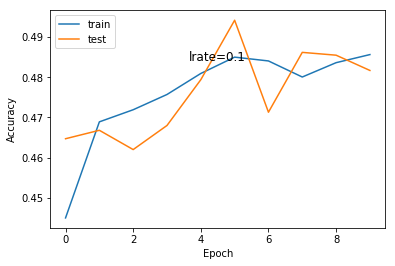

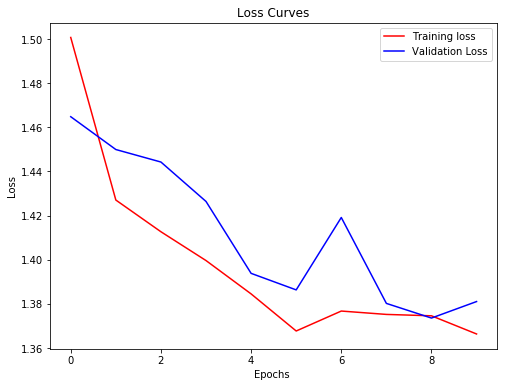

Execution time 518.4978369969976


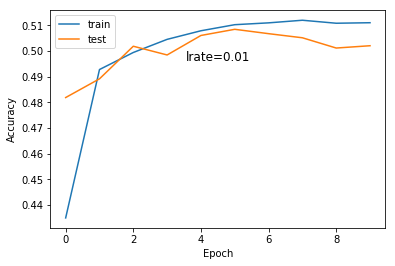

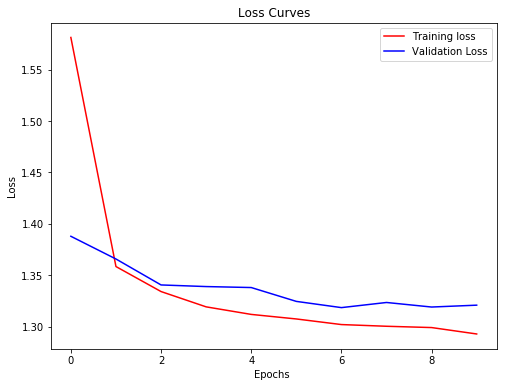

Execution time 543.3441044249994


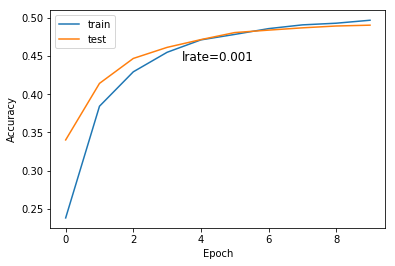

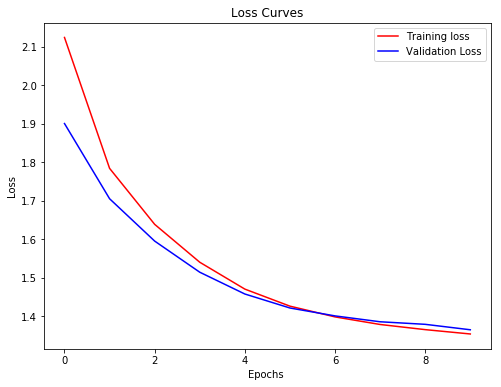

Execution time 543.5569710309974


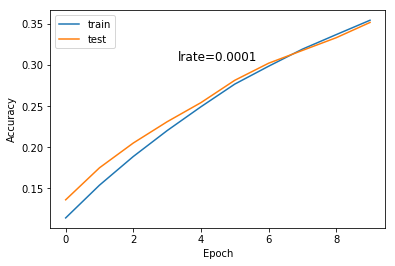

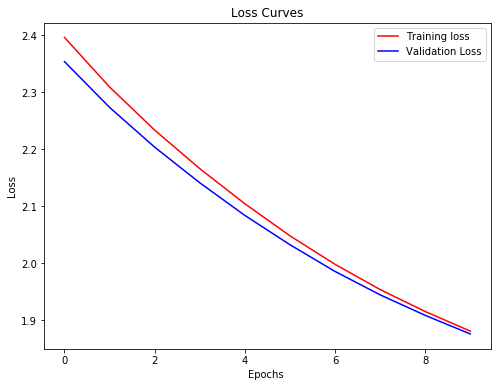

Execution time 545.0050676960018


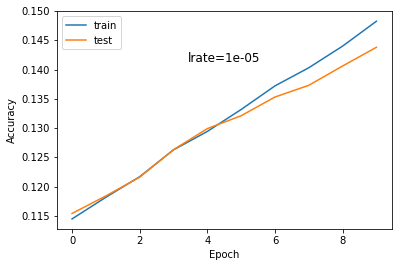

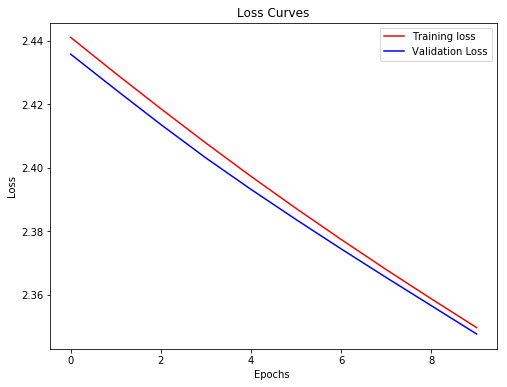

Execution time 547.1852829620002


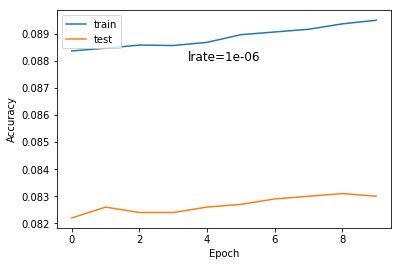

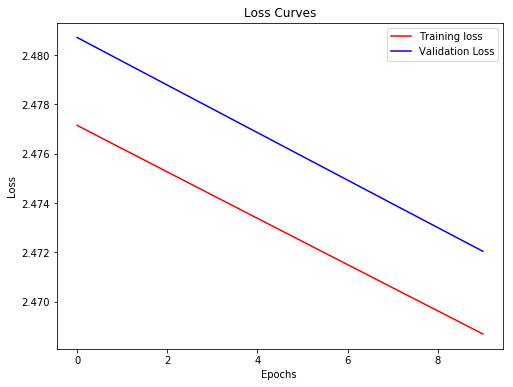

Execution time 548.0541720480032


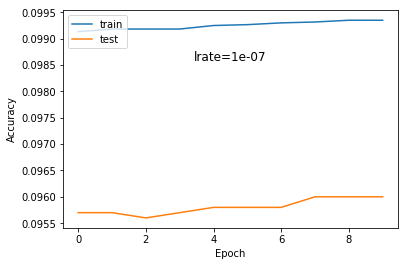

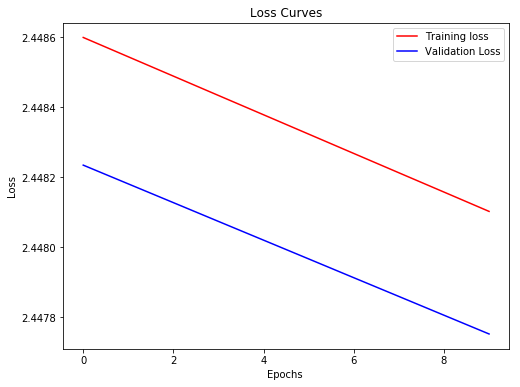

In [81]:
for i in range(len(learning_rates)):
  fit_model(x_train, y_train, x_test, y_test, learning_rates[i])


In [0]:
momentums = [0.0, 0.5, 0.9, 0.99]
def fit_model(x_train, y_train, x_test, y_test, momentum):
	# define model
  model = Sequential()

  # Recurrent layers supported: SimpleRNN, LSTM, GRU:
  model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

  # To stack multiple RNN layers, all RNN layers except the last one need
  # to have "return_sequences=True".  An example of using two RNN layers:
  #model.add(SimpleRNN(16,
  #                    input_shape=(img_rows, img_cols),
  #                    return_sequences=True))
  #model.add(SimpleRNN(32))

  model.add(Dense(units=nb_classes))
  model.add(Activation('softmax'))
  # compile model
  opt = SGD(lr=0.01,momentum=momentum)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('momentum='+str(momentum), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 1.3236414541244508
Test accuracy: 0.5065
Execution time 540.4106430440006


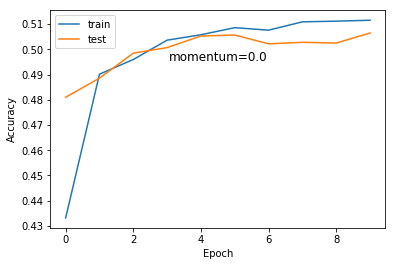

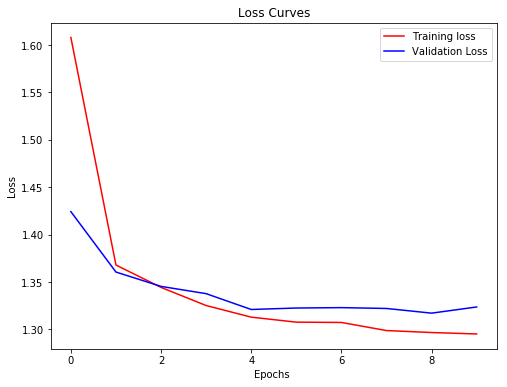

Test loss: 1.3187339286804198
Test accuracy: 0.5106
Execution time 550.4989106450012


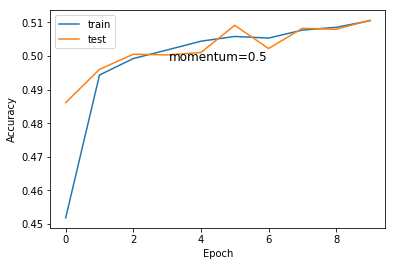

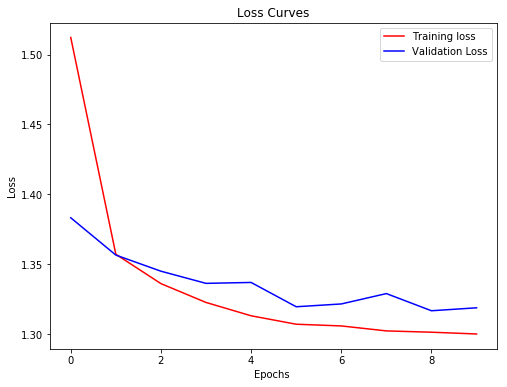

Test loss: 1.4143579824447632
Test accuracy: 0.4721
Execution time 547.5802354219995


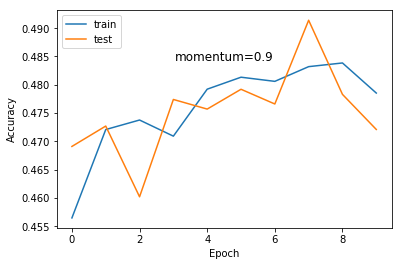

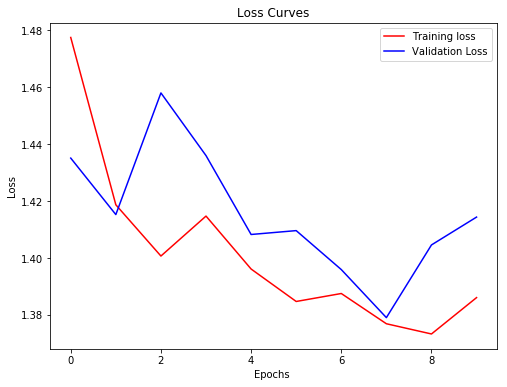

Test loss: 1.8778821357727051
Test accuracy: 0.344
Execution time 546.3948159749998


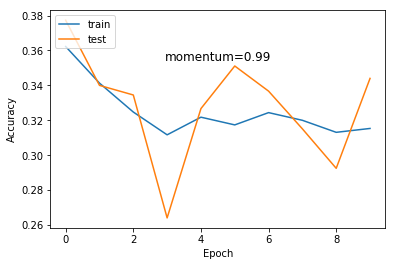

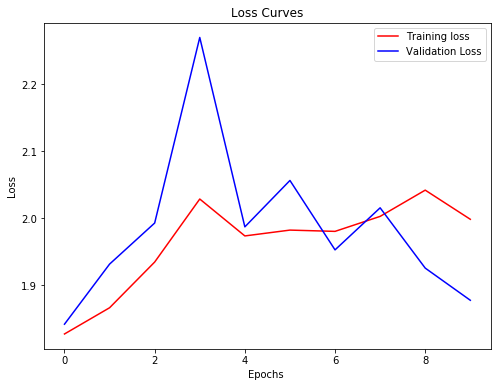

In [83]:
for i in range(len(momentums)):
  fit_model(x_train, y_train, x_test, y_test, momentums[i])


In [0]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

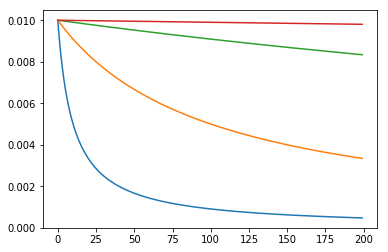

In [85]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))

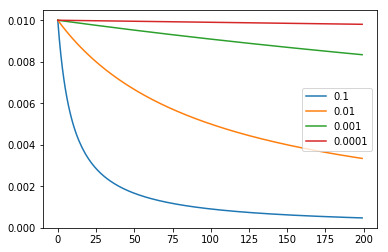

In [86]:
# demonstrate the effect of decay on the learning rate
from matplotlib import pyplot

# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	pyplot.plot(lrates, label=str(decay))
pyplot.legend()
pyplot.show()

In [0]:
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
def fit_model(x_train, y_train, x_test, y_test, decay):
	# define model
  model = Sequential()

  # Recurrent layers supported: SimpleRNN, LSTM, GRU:
  model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

  # To stack multiple RNN layers, all RNN layers except the last one need
  # to have "return_sequences=True".  An example of using two RNN layers:
  #model.add(SimpleRNN(16,
  #                    input_shape=(img_rows, img_cols),
  #                    return_sequences=True))
  #model.add(SimpleRNN(32))

  model.add(Dense(units=nb_classes))
  model.add(Activation('softmax'))
  # compile model
  opt = SGD(lr=0.01,decay=decay)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('decay='+str(decay), pad=-80)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 2.1518947288513184
Test accuracy: 0.2003
Execution time 553.0807654729979


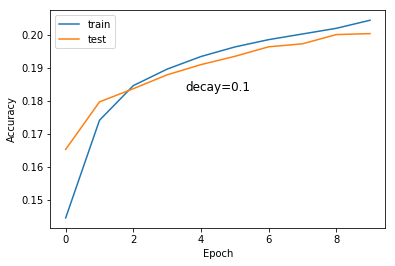

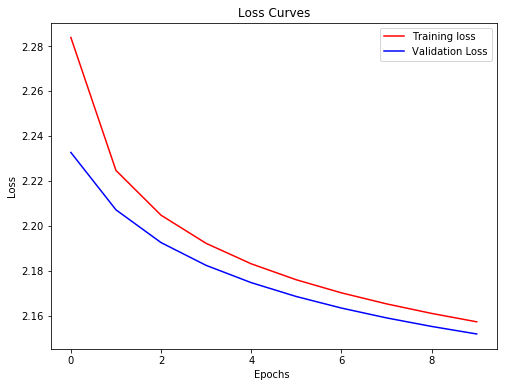

Test loss: 1.6197667053222655
Test accuracy: 0.4363
Execution time 547.6283239170007


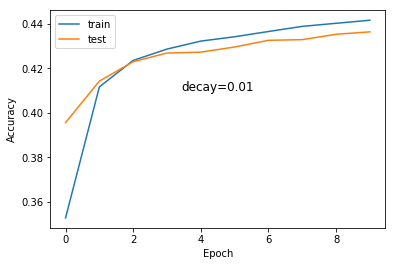

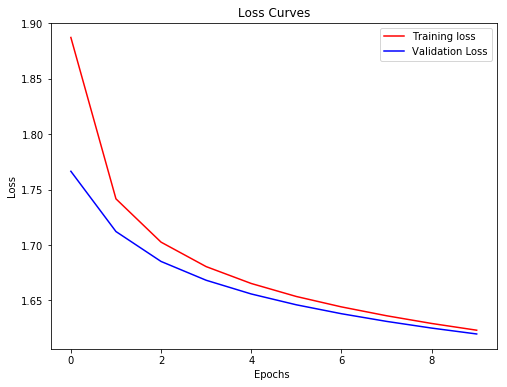

Test loss: 1.3418245948791503
Test accuracy: 0.4953
Execution time 550.5157297250007


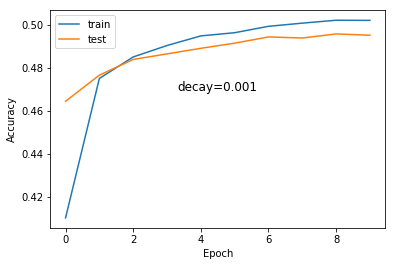

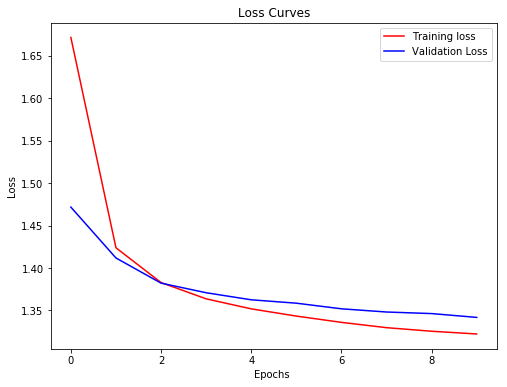

Test loss: 1.3091353477478027
Test accuracy: 0.5045
Execution time 554.073578841002


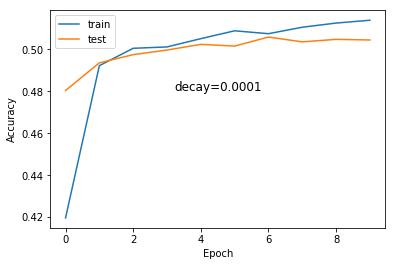

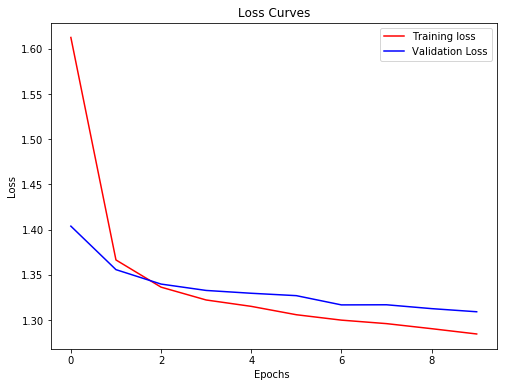

In [88]:
for i in range(len(decay_rates)):
  fit_model(x_train, y_train, x_test, y_test, decay_rates[i])


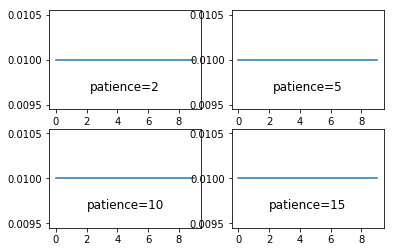

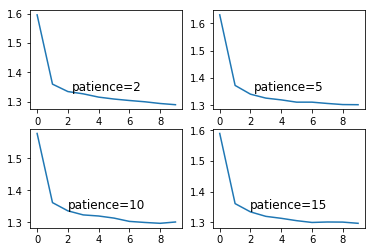

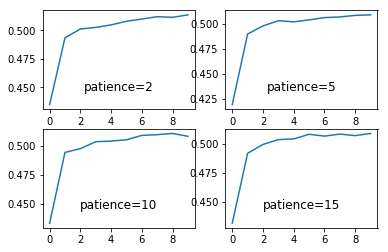

In [89]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras import backend
from matplotlib import pyplot

# monitor the learning rate
class LearningRateMonitor(Callback):
	# start of training
	def on_train_begin(self, logs={}):
		self.lrates = list()

	# end of each training epoch
	def on_epoch_end(self, epoch, logs={}):
		# get and store the learning rate
		optimizer = self.model.optimizer
		lrate = float(backend.get_value(self.model.optimizer.lr))
		self.lrates.append(lrate)


# fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, patience):
	# define model
  model = Sequential()

  # Recurrent layers supported: SimpleRNN, LSTM, GRU:
  model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

  # To stack multiple RNN layers, all RNN layers except the last one need
  # to have "return_sequences=True".  An example of using two RNN layers:
  #model.add(SimpleRNN(16,
  #                    input_shape=(img_rows, img_cols),
  #                    return_sequences=True))
  #model.add(SimpleRNN(32))

  model.add(Dense(units=nb_classes))
  model.add(Activation('softmax'))
	# compile model
  opt = SGD(lr=0.01)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
  lrm = LearningRateMonitor()
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, verbose=0, callbacks=[rlrp, lrm])
  return lrm.lrates, history.history['loss'], history.history['acc']

# create line plots for a series
def line_plots(patiences, series):
	for i in range(len(patiences)):
		pyplot.subplot(220 + (i+1))
		pyplot.plot(series[i])
		pyplot.title('patience='+str(patiences[i]), pad=-80)
	pyplot.show()

patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
	# fit model and plot learning curves for a patience
	lr, loss, acc = fit_model(x_train,y_train,x_test,y_test, patiences[i])
	lr_list.append(lr)
	loss_list.append(loss)
	acc_list.append(acc)
# plot learning rates
line_plots(patiences, lr_list)
# plot loss
line_plots(patiences, loss_list)
# plot accuracy
line_plots(patiences, acc_list)

In [0]:
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adam']
def fit_model(x_train, y_train, x_test, y_test, optimizer):
	# define model
  model = Sequential()

  # Recurrent layers supported: SimpleRNN, LSTM, GRU:
  model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

  # To stack multiple RNN layers, all RNN layers except the last one need
  # to have "return_sequences=True".  An example of using two RNN layers:
  #model.add(SimpleRNN(16,
  #                    input_shape=(img_rows, img_cols),
  #                    return_sequences=True))
  #model.add(SimpleRNN(32))

  model.add(Dense(units=nb_classes))
  model.add(Activation('softmax'))
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  # fit model
  start = timeit.default_timer()
  history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
  stop = timeit.default_timer()
  score = model.evaluate(x_test, y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  
  print("Execution time", stop-start)
  # plot learning curves
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Epoch')
  pyplot.title('optimizer='+str(optimizer), pad=-50)
  pyplot.legend(['train', 'test'], loc='upper left')
  pyplot.figure(figsize=[8,6])
  pyplot.plot(history.history['loss'],'r')
  pyplot.plot(history.history['val_loss'],'b')
  pyplot.legend(['Training loss', 'Validation Loss'])
  pyplot.xlabel('Epochs ')
  pyplot.ylabel('Loss')
  pyplot.title('Loss Curves')
  pyplot.show()
  



Test loss: 1.329955941772461
Test accuracy: 0.5006
Execution time 556.2208627859982


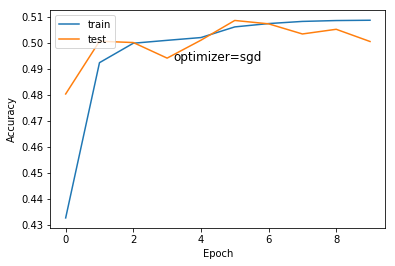

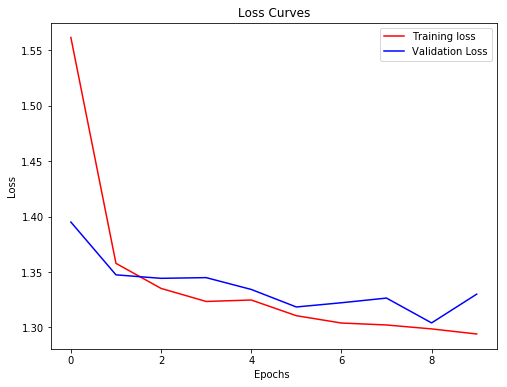

Test loss: 1.2300233779907226
Test accuracy: 0.5219
Execution time 554.7731858369989


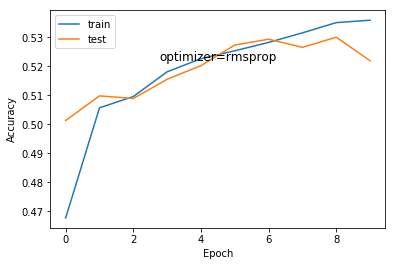

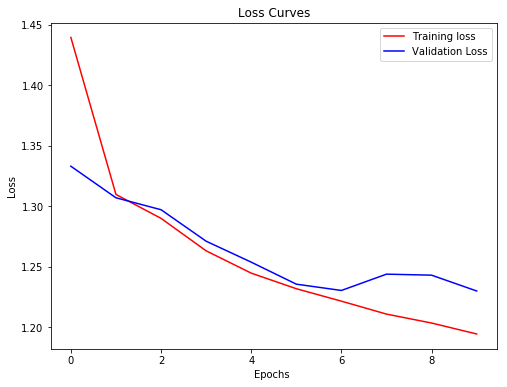

Test loss: 1.2798198753356933
Test accuracy: 0.5153
Execution time 511.89716203900025


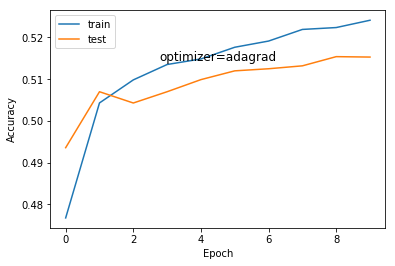

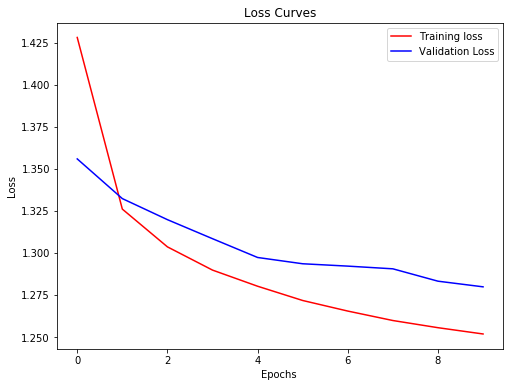

Test loss: 1.2263239725112915
Test accuracy: 0.5268
Execution time 507.3368567139987


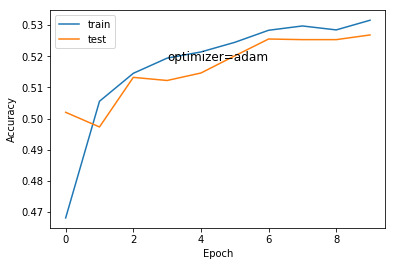

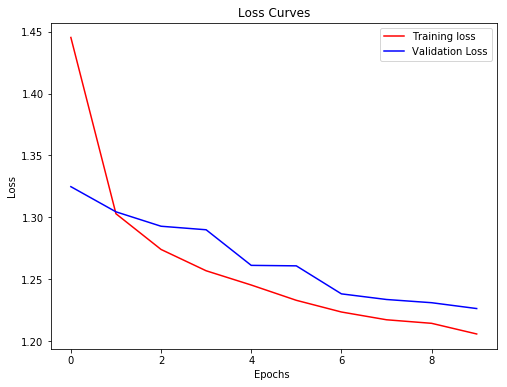

In [93]:
for i in range(len(optimizer)):
  fit_model(x_train, y_train, x_test, y_test, optimizer[i])
